In [9]:
import csv
import numpy as np

from matplotlib import pyplot as plot
from operator import itemgetter

In [15]:
fields = ["idx", "id", "category", "language", "text", "score"]

with open("data/dontpatronizeme_pcl.tsv", "r") as f:
    reader = csv.DictReader(f, delimiter="\t", fieldnames=fields)
    dataset = list(reader)

def attribute_series(attr, dataset):
    return list(map(itemgetter(attr), dataset))

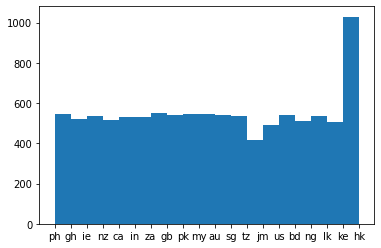

In [16]:
languages = attribute_series("language", dataset)
langauge_bins = np.unique(languages)

plot.hist(languages, np.arange(len(langauge_bins)))
plot.show()

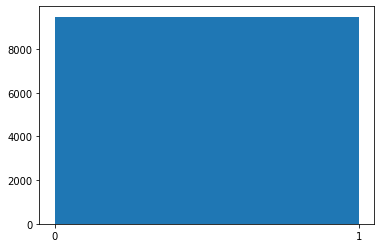

In [18]:
scores = attribute_series("score", dataset)
score_bins = np.unique(scores)

plot.hist(scores, np.arange(3))
plot.show()